<a href="https://colab.research.google.com/github/ParthG60/HousingMarket_St_Andrews/blob/main/VIP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Colab


## Draft 2 of maple model in python. With demand curves 

[470.13132444]


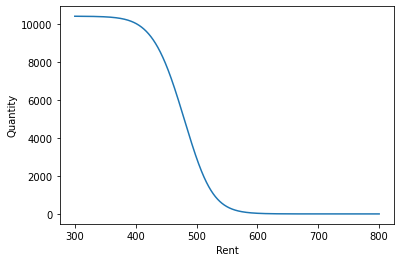

'UG_L = Probabilites[0]*Num_Students[0]*(PSA(coef[0]*Income_levels[0] - coef[1]*x + coef[2]*Degree_levels[0]))\nUG_H = (1-Probabilites[0])*Num_Students[0]*(PSA(coef[0]*Income_levels[1] - coef[1]*x + coef[2]*Degree_levels[0]))\nPG_L =Probabilites[1]*Num_Students[1]*(PSA(coef[0]*Income_levels[0] - coef[1]*x + coef[2]*Degree_levels[1]))\nPG_H =(1-Probabilites[1])*Num_Students[1]*(PSA(coef[0]*Income_levels[1] - coef[1]*x + coef[2]*Degree_levels[1]))\nplt.plot(x, UG_L)\nplt.plot(x, UG_H)\nplt.plot(x, PG_L)\nplt.plot(x, PG_H)'

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import math
from scipy.optimize import fsolve
# ^^^ these are the relevant libraries an packages

coef = [7/5000,1,40]   # coeffiecients a,b,c for the utility function

sig = 20 #variance/sigma for error term

U_notSTA = -400     #disutility of not being in St Andrews
Income_levels = [20000,40000]     #low income ,high income
Degree_levels = [1,0]        # Binary values 1 = UG, 0 = PG
Num_Students = [8260,2164]       # Number of UGs, Number of PGs
Probabilites = [0.4,0.35]        # Probabilities that a low income group will choose to stay in StA UG_low,PG_low,
Quantity = 6000       # number of available rooms
e = math.e        # initialising eulers number

def demand(R):    # Function gives us the equation we want to solve and variable we are solving for. R stands for Rent
    #UGL stands for demand St_A for UG_low. Rest of the variable names follow the same logic

    UGL = Probabilites[0]*Num_Students[0]*(PSA(coef[0]*Income_levels[0] - coef[1]*R + coef[2]*Degree_levels[0]))
    UGH = (1-Probabilites[0])*Num_Students[0]*(PSA(coef[0]*Income_levels[1] - coef[1]*R + coef[2]*Degree_levels[0]))
    PGL =Probabilites[1]*Num_Students[1]*(PSA(coef[0]*Income_levels[0] - coef[1]*R + coef[2]*Degree_levels[1]))
    PGH =(1-Probabilites[1])*Num_Students[1]*(PSA(coef[0]*Income_levels[1] - coef[1]*R + coef[2]*Degree_levels[1]))

    # total demand = demand UG_low + demand UG_high + demand PG_low+ demand PG_high
    equation = UGL+UGH+PGL+PGH-Quantity
    # I have subtractred quantity here because function fsolve solves the equation for the root
    return equation  # returns the equation with variable R
def PSA(utility):
  return  (1-1 / (1 + e**((utility - U_notSTA)/sig)))

R_guess = 500  # my guess for what  the root can be
R = fsolve(demand,R_guess)  # fsolve gives us the actual root regardless of the guess.
# the guess is just used to hint at which side of the root we may want -ve or +ve. In this case -ve doesn't make sense
print(R)

#plotting the demand curve
x = np.arange(300, 800, 0.1)
y = demand(x)+Quantity
plt.xlabel('Rent')
plt.ylabel('Quantity')
plt.plot(x,y)
plt.show()


"""UG_L = Probabilites[0]*Num_Students[0]*(PSA(coef[0]*Income_levels[0] - coef[1]*x + coef[2]*Degree_levels[0]))
UG_H = (1-Probabilites[0])*Num_Students[0]*(PSA(coef[0]*Income_levels[1] - coef[1]*x + coef[2]*Degree_levels[0]))
PG_L =Probabilites[1]*Num_Students[1]*(PSA(coef[0]*Income_levels[0] - coef[1]*x + coef[2]*Degree_levels[1]))
PG_H =(1-Probabilites[1])*Num_Students[1]*(PSA(coef[0]*Income_levels[1] - coef[1]*x + coef[2]*Degree_levels[1]))
plt.plot(x, UG_L)
plt.plot(x, UG_H)
plt.plot(x, PG_L)
plt.plot(x, PG_H)"""   # this block of code plots individual demand components

# when sig = 20 then R=470.13132  Luc's R = 470.13132

In [ ]:
print(2%3)

# Draft 1 of Recreation of Luc's Maple model

1.   List item
2.   List item



In [ ]:
import numpy as np
import math
from scipy.optimize import fsolve
# ^^^ these are the relevant libraries an packages

coef = [7/5000,1,40]   # coeffiecients a,b,c for the utility function

sig = 20 #variance/sigma for error term

U_notSTA = -400 #disutility of not being in St Andrews
Income_levels = [20000,40000]  #low income ,high income
Degree_levels = [1,0]  # Binary values 1 = UG, 0 = PG
Num_Students = [8260,2164]  # Number of UGs, Number of PGs
Probabilites = [0.4,0.6,0.35,0.65]   # Probabilities that a certain group will choose to stay in StA UG_low, UG_high, PG_low, PG_high
Quantity = 6000  # number of available rooms
e = math.e  # initialising eulers number

def f(R):    # Function gives us the equation we want to solve and variable we are solving for. R stands for Rent
    #UGL stands for demand St_A for UG_low. Rest of the variable names follow the same logic
    UGL =Probabilites[0]*Num_Students[0]*(1 - 1 / (1 + e ** ((coef[0]*Income_levels[0] - coef[1]*R + coef[2]*Degree_levels[0] - U_notSTA)/sig)))
    UGH =Probabilites[1]*Num_Students[0]*(1 - 1 / (1 + e ** ((coef[0]*Income_levels[1] - coef[1]*R + coef[2]*Degree_levels[0] - U_notSTA)/sig)))
    PGL =Probabilites[2]*Num_Students[1]*(1 - 1 / (1 + e ** ((coef[0]*Income_levels[0] - coef[1]*R + coef[2]*Degree_levels[1] - U_notSTA)/sig)))
    PGH =Probabilites[3]*Num_Students[1]*(1 - 1 / (1 + e ** ((coef[0]*Income_levels[1] - coef[1]*R + coef[2]*Degree_levels[1] - U_notSTA)/sig)))
    # total demand = demand UG_low + demand UG_high + demand PG_low+ demand PG_high
    equation = UGL+UGH+PGL+PGH-Quantity
    # I have subtractred quantity here because function fsolve solves the equation for the root
    return equation # returns the equation with variable R

R_guess = 500  # my guess for what  the root can be
R = fsolve(f,R_guess)  # fsolve gives us the actual root regardless of the guess.
# the guess is just used to hint at which side of the root we may want -ve or +ve. In this case -ve doesn't make sense
print(R)
# when sig = 20 then R=470.13132  Luc's R = 470.13132

[470.13132444]


Goals for this week: 


*   probability and binomial logistic packages
*   brainstorm ways to make function scalable (likely through use of loops)
*figure out how to plot demand curves

